<a href="https://colab.research.google.com/github/Harsha1569/DSP_Lab/blob/main/Experiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Note: Roll Number = 191EE123 <br>
a = 1 + mod(123,4) = 4

In [ ]:
import numpy as np
import IPython
import scipy
import math
import pandas as pd
import io
from IPython.display import Audio, display
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft



a = 4
pi = np.pi


%matplotlib inline
plt.style.use(['seaborn-notebook'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (15, 8),
    "axes.labelsize": 15,
    "font.size": 8})

# **Problem** **1**. <br>
Part 1:

In [ ]:
f1 = 5*a
f2 = 6*a
f3 = 10*a
t = np.linspace(0,1/a,5000)
y1 = a*np.cos(2*pi*f1*t)
y2 = (a/2)*np.cos(2*pi*f2*t)
y3 = (a/4)*np.cos(2*pi*f3*t)
plot_label = ['$4*cos(40*\pi*t)$', '$2*cos(48*\pi*t)$', '$1*cos(80*\pi*t)$']
plot_title = ['Cosine function with amplitude ' + r'$\alpha$' + ' and frequency 5'+r'$\alpha$'+ ' Hz', 'Cosine function with amplitude ' + r'$\alpha /2$' + ' and frequency 6'+r'$\alpha$'+ ' Hz', 'Cosine function with amplitude ' + r'$\alpha /4$' + ' and frequency 10'+r'$\alpha$'+ ' Hz']

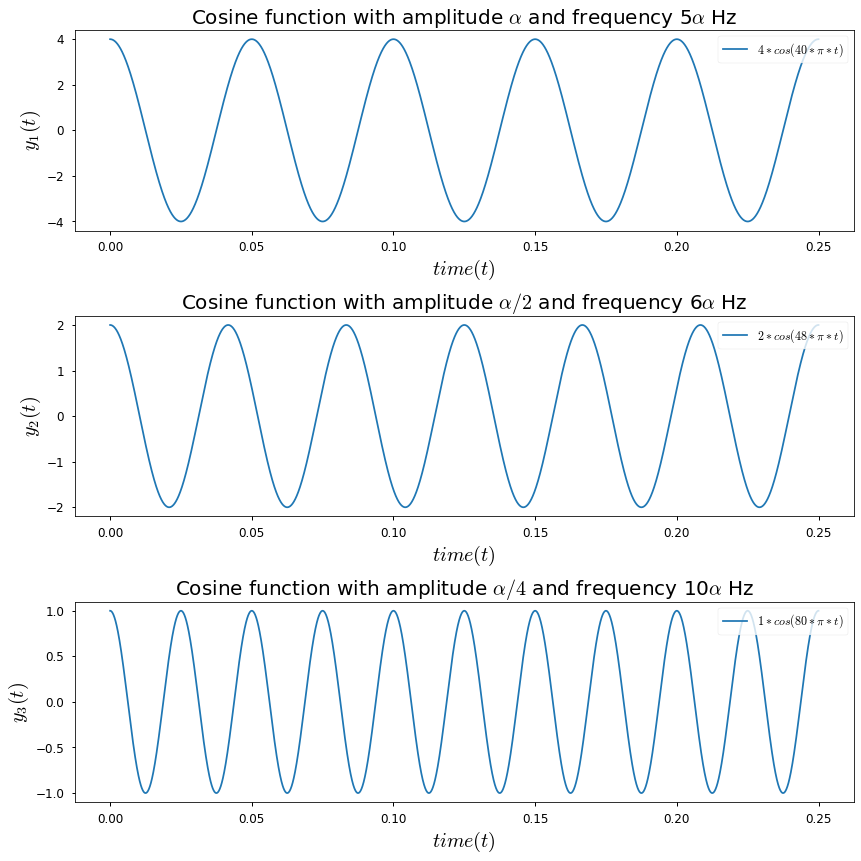

In [ ]:
fig, axs = plt.subplots(3, figsize=(12,12))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].plot(x, y, label = plot_label[row])
    axs[row].legend(loc = 'upper right', fontsize = 12)
    axs[row].set_title(plot_title[row], fontsize = 20)
    axs[row].set_xlabel(xaxis_label, fontsize = 20)
    axs[row].set_ylabel(yaxis_label, fontsize = 20)
    axs[row].tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
    
plot_signal(t, y1, xaxis_label=r'$time(t)$', yaxis_label=r'$y_1(t)$', row=0)
plot_signal(t, y2, xaxis_label=r'$time(t)$', yaxis_label=r'$y_2(t)$', row=1)
plot_signal(t, y3, xaxis_label=r'$time(t)$', yaxis_label=r'$y_3(t)$', row=2)

Part 2:

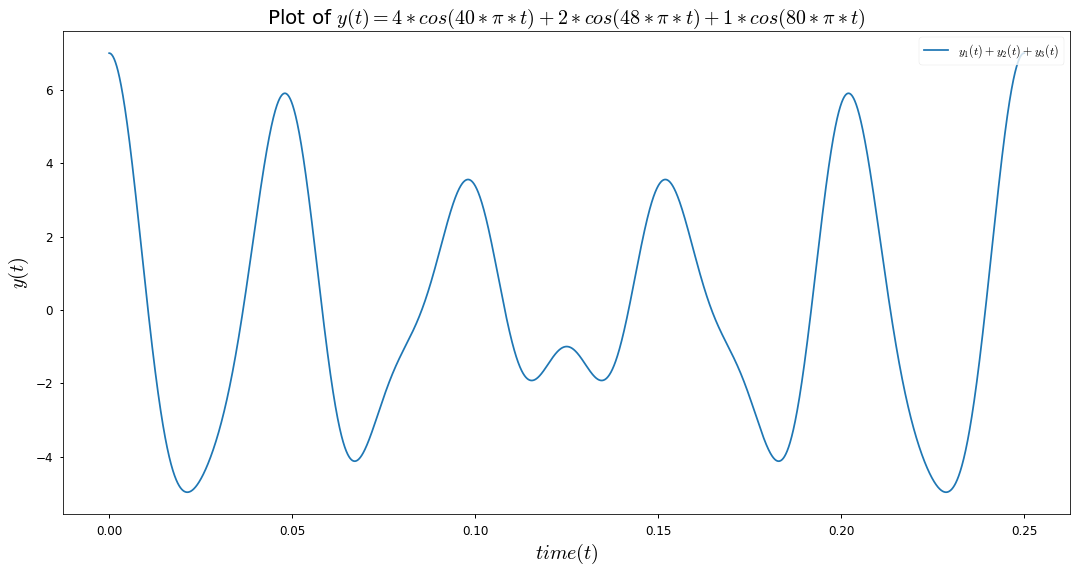

In [46]:
y = y1 + y2 + y3
fig, axs = plt.subplots()
axs.plot(t, y, label=r'$y_1(t)+y_2(t)+y_3(t)$')
axs.legend(loc = 'upper right', fontsize = 12)
axs.set_ylabel(r'$y(t)$', fontsize = 20)
axs.set_xlabel(r'$time(t)$', fontsize = 20)
axs.tick_params(axis="both", labelsize = 12)
axs.set_title('Plot of $y(t) = 4*cos(40*\pi*t) + 2*cos(48*\pi*t)+ 1*cos(80*\pi*t)$', fontsize = 20)
fig.tight_layout()

Part 3: <br>
a) Given sampling rate $F_s$ = 14$\alpha$ $\frac{samples}{sec}$= 56$\frac{samples}{sec}$ <br>
b) NyquistRate ($F_s$) = twice the max frequency = 2*10$\alpha$ = 80$\frac{samples}{sec}$ <br>
c) Since, the 6$\alpha$ frequecy is alliased to 3$\alpha$, we can say that the folding frequency ($\frac{F_s}{2}$) = $\frac{6\alpha + 3\alpha}{2}$ = 4.5$\alpha$ Hz <br>
this implies that the sampling frequency $F_s$ = $2*4.5\alpha$ = 9$\alpha$$\frac{samples}{sec}$ 


In [80]:
def cummulative_signal(t):
  return a*np.cos(2*pi*5*a*t) + (a/2)*np.cos(2*pi*6*a*t) + (a/4)*np.cos(2*pi*10*a*t)

sampling_freq_1 = 14*a
sampling_freq_2 = 20*a
sampling_freq_3 = 9*a
n1=np.arange(0, (1/a)+(1/sampling_freq_1), (1/sampling_freq_1))
n2=np.arange(0, (1/a)+(1/sampling_freq_2), (1/sampling_freq_2))
n3=np.arange(0, (1/a)+(1/sampling_freq_3), (1/sampling_freq_3))
stem_plot_title = ['Stem plot of cummulative signal when $F_s$ = 14' + r'$\alpha\ \frac{samples}{sec}$','Stem plot of cummulative signal when $F_s$ = 20' + r'$\alpha\ \frac{samples}{sec}$','Stem plot of cummulative signal when $F_s$ = 9' + r'$\alpha\ \frac{samples}{sec}$']

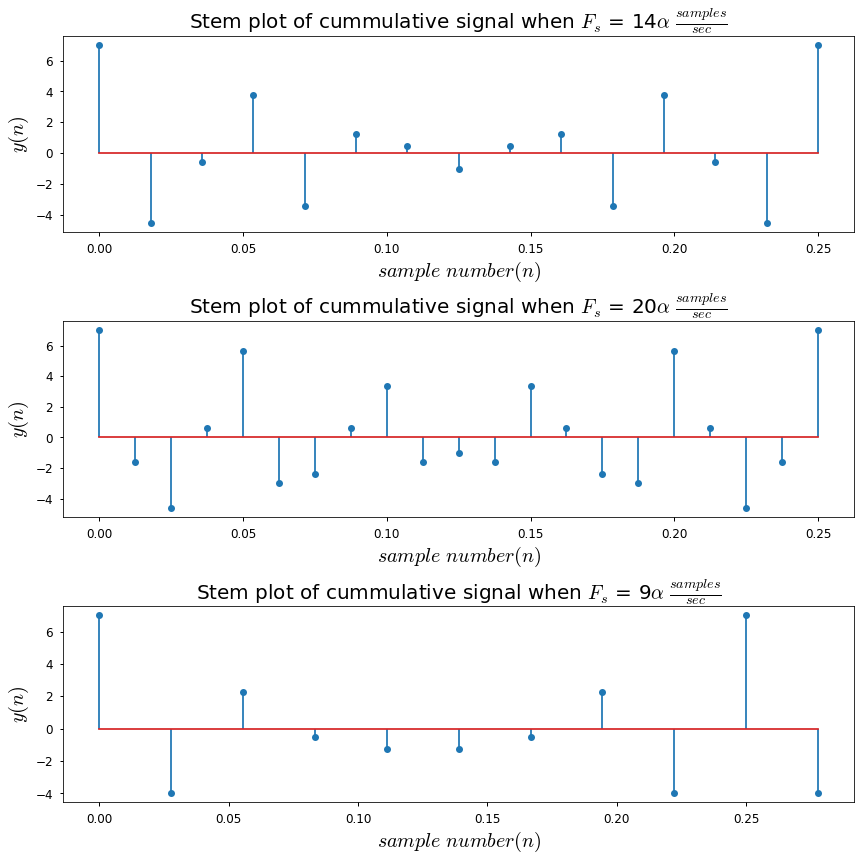

In [81]:
fig, axs = plt.subplots(3, figsize=(12,12))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].stem(x, y, use_line_collection = True)
    axs[row].set_title(stem_plot_title[row], fontsize = 20)
    axs[row].set_xlabel(xaxis_label, fontsize = 20)
    axs[row].set_ylabel(yaxis_label, fontsize = 20)
    axs[row].tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
    
plot_signal(n1, cummulative_signal(n1), xaxis_label=r'$sample\ number(n)$', yaxis_label=r'$y(n)$', row=0)
plot_signal(n2, cummulative_signal(n2), xaxis_label=r'$sample\ number(n)$', yaxis_label=r'$y(n)$', row=1)
plot_signal(n3, cummulative_signal(n3), xaxis_label=r'$sample\ number(n)$', yaxis_label=r'$y(n)$', row=2)

Part 4:


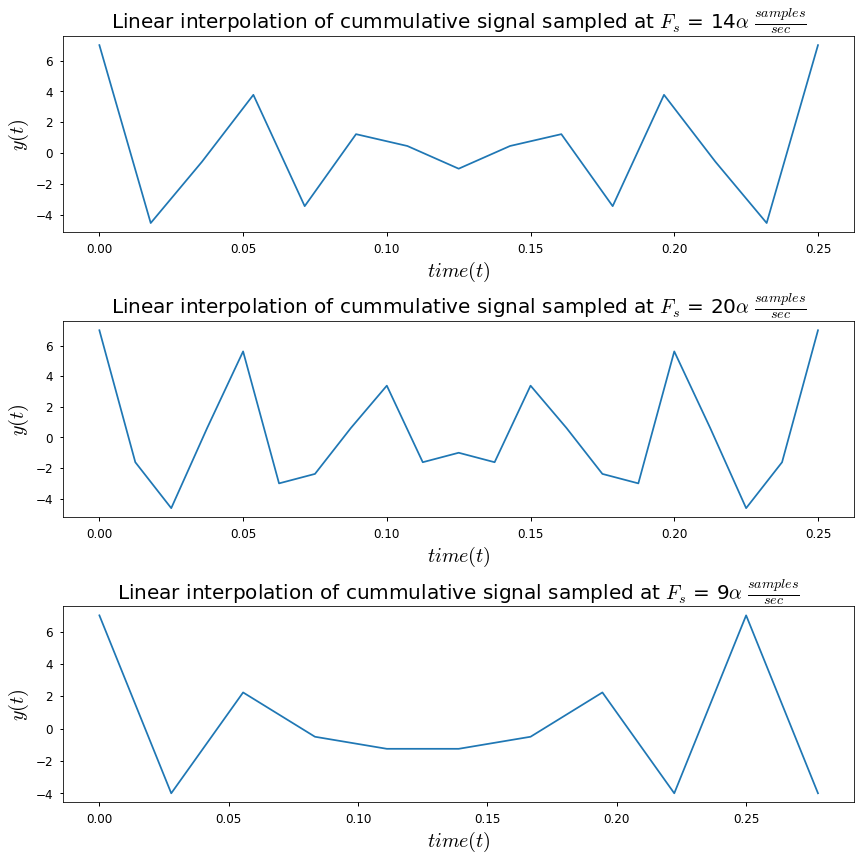

In [85]:
title = ['Linear interpolation of cummulative signal sampled at $F_s$ = 14' + r'$\alpha\ \frac{samples}{sec}$','Linear interpolation of cummulative signal sampled at $F_s$ = 20' + r'$\alpha\ \frac{samples}{sec}$','Linear interpolation of cummulative signal sampled at $F_s$ = 9' + r'$\alpha\ \frac{samples}{sec}$']
fig, axs = plt.subplots(3, figsize=(12,12))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].plot(x, y)
    axs[row].set_title(title[row], fontsize = 20)
    axs[row].set_xlabel(xaxis_label, fontsize = 20)
    axs[row].set_ylabel(yaxis_label, fontsize = 20)
    axs[row].tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
    
plot_signal(n1, cummulative_signal(n1), xaxis_label=r'$time(t)$', yaxis_label=r'$y(t)$', row=0)
plot_signal(n2, cummulative_signal(n2), xaxis_label=r'$time(t)$', yaxis_label=r'$y(t)$', row=1)
plot_signal(n3, cummulative_signal(n3), xaxis_label=r'$time(t)$', yaxis_label=r'$y(t)$', row=2)